Importing the essential packages for the project

In [2]:
#install and import NLP  essential packages
!pip install fasttext
import numpy as np
import pandas as pd
import fasttext.util
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

model's parameters

In [3]:
embedding_vector_length = 300
sentences_max_len = 100
lstm_units = 50

In [4]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3946, done.
remote: Counting objects: 100% (980/980), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 3946 (delta 878), reused 839 (delta 828), pack-reused 2966
Receiving objects: 100% (3946/3946), 8.25 MiB | 15.51 MiB/s, done.
Resolving deltas: 100% (2510/2510), done.


In [5]:
!sudo pip install fastText/.
!cd fastText
fasttext.util.download_model('fa', if_exists='ignore')
ft = fasttext.load_model('cc.fa.300.bin')

Processing ./fastText
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 60.7 MB/s eta 0:00:0000:0100:01
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      /usr/lib/python3/dist-packages/setuptools/dist.py:723: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
        warnings.warn(
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-3.10
      creating build/lib.linux-x86_64-3.10/fasttext
      copying python/fasttext_module/fasttext/__init__.py -> build/lib.linux-x86_64-3.10/fasttext
      copying python/fasttext_module/fasttext/FastText.py -> build/lib.linux-x86_64-3.10/fasttext
      creating build/lib.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 (100.00%) [==================================================>]================================================> ]=================================================> ]


inspecting the result of getting nearest neighbors using the fasttext model on certain words.

In [6]:
ft.get_nearest_neighbors('نقره')

[(0.6434043049812317, 'ونقره'),
 (0.6109495162963867, 'طلا'),
 (0.596237063407898, 'نقره\u200c'),
 (0.5931195616722107, 'نقرهای'),
 (0.5862149596214294, 'برنز'),
 (0.5492578744888306, 'طلای'),
 (0.5402958393096924, 'نقرهنیم'),
 (0.5320623517036438, 'برنزی'),
 (0.5307127237319946, 'طلاونقره'),
 (0.5244537591934204, 'طلایی')]

In [7]:
ft.get_nearest_neighbors('تولید')

[(0.700291633605957, 'توليد'),
 (0.6547907590866089, 'تولیدات'),
 (0.6501815319061279, 'تولیداز'),
 (0.6395469307899475, 'تولیدآن'),
 (0.6383940577507019, 'تولیدی'),
 (0.6302047371864319, 'تولیدکننده'),
 (0.6237210035324097, 'تولیدآنها'),
 (0.6222999691963196, 'تولید4'),
 (0.6199944615364075, 'گفت:تولید'),
 (0.6174042820930481, 'تولید\u200cی')]

In [8]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [9]:
#import digikala sentiment analysis dataset
df = pd.read_csv('/kaggle/input/digikala-comments-persian-sentiment-analysis/data.csv')
df.head(3)

,Text,Score,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1
1,خرید این محصول رو توصیه میکنم,84,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1


In [10]:
text_lengths = df['Text'].apply(lambda x: len(x.split(' '))).values

In [11]:
print('mean of the sentences length -> {}'.format(np.mean(text_lengths)))

mean of the sentences length -> 56.590616375344986


In [12]:
df.drop(columns=['Score'], axis=1, inplace=True)

#make two state for sentiment to using binary_crossentropy later 
df['Suggestion'] = df['Suggestion'].replace(2, 1)
df['Suggestion'] = df['Suggestion'].replace(3, 0)

In [13]:
df.head(5)

,Text,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,1
1,خرید این محصول رو توصیه میکنم,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,1
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,1


In [14]:
df_minority = df[df['Suggestion']==0]
df_majority = df[df['Suggestion']==1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=103) # reproducible results

# Combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])

In [15]:
texts = df.Text.values
tokenizer = Tokenizer(num_words=3300)
tokenizer.fit_on_texts(texts)

vocab_size = len(tokenizer.word_index) + 1
print('vocab size: {}'.format(vocab_size))

encoded_texts = tokenizer.texts_to_sequences(texts)

padded_sequence = pad_sequences(encoded_texts, maxlen=sentences_max_len, padding='post')
print('number of padded sequences and its shape:')
print(padded_sequence.shape)

vocab size: 12125
number of padded sequences and its shape:
(5602, 100)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequence, df.Suggestion.values, test_size=0.2, shuffle=True)

extracting the embedding form of every word in the sequences to take advantage of them in the embedding layer.

In [17]:
embedding_matrix = np.zeros((vocab_size, 300))

for word, i in tokenizer.word_index.items():
  embedding_vector = ft.get_word_vector(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

Buliding the model

In [19]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=sentences_max_len, weights=[embedding_matrix], trainable=True))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(lstm_units, dropout=0.45, recurrent_dropout=0.45))
model.add(Dropout(0.15))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          3637500   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 300)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                70200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 3,707,751
Trainable params: 3,707,751
Non-trainable params: 0
____________________________________________

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, TerminateOnNaN

callback_list = [
                 ModelCheckpoint(
                     filepath = '/kaggle/working/best_Per_Sen_Analysis_Model.hdf5',
                     monitor = 'val_acc',
                     verbose = 1,
                     save_best_only = True,
                     save_weights_only = False,
                     mode = 'max',
                     period = 1
                 ),

                 EarlyStopping(
                    monitor = 'val_acc',
                    patience = 8,
                    verbose = 1,
                    mode = 'max',
                    baseline = 0.5,
                    restore_best_weights = True
                 ),

                 ReduceLROnPlateau(
                     monitor = 'val_loss',
                     factor = 0.2,
                     patience = 8,
                     verbose = 1,
                     mode = 'min',
                     cooldown = 1,
                     min_lr = 0
                 ),

                 TerminateOnNaN()
]
 
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.25,callbacks =callback_list )

Epoch 1/50
105/105 [==============================] - 68s 627ms/step - loss: 0.6896 - accuracy: 0.5060 - val_loss: 0.6820 - val_accuracy: 0.5433 - lr: 0.0010
Epoch 2/50
105/105 [==============================] - 59s 556ms/step - loss: 0.6705 - accuracy: 0.5542 - val_loss: 0.6579 - val_accuracy: 0.5388 - lr: 0.0010
Epoch 3/50
105/105 [==============================] - 52s 493ms/step - loss: 0.6336 - accuracy: 0.5622 - val_loss: 0.6183 - val_accuracy: 0.5870 - lr: 0.0010
Epoch 4/50
105/105 [==============================] - 52s 499ms/step - loss: 0.6092 - accuracy: 0.5899 - val_loss: 0.6199 - val_accuracy: 0.6485 - lr: 0.0010
Epoch 5/50
105/105 [==============================] - 49s 462ms/step - loss: 0.6229 - accuracy: 0.5985 - val_loss: 0.6249 - val_accuracy: 0.5638 - lr: 0.0010
Epoch 6/50
105/105 [==============================] - 49s 471ms/step - loss: 0.6009 - accuracy: 0.6051 - val_loss: 0.6231 - val_accuracy: 0.6387 - lr: 0.0010
Epoch 7/50
105/105 [==============================] 

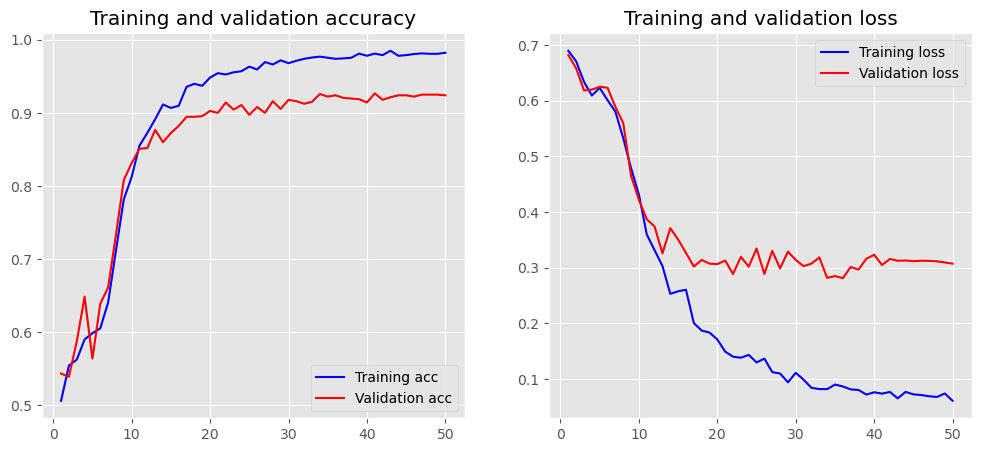

In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [26]:
model.evaluate(X_test, y_test)

36/36 [==============================] - 1s 27ms/step - loss: 0.2333 - accuracy: 0.9376


[0.2333092838525772, 0.937555730342865]

In [27]:
#save trained model on drive
model_save_name = 'Per_Sen_Analysis_Model.hdf5'
path = F"/kaggle/working/{model_save_name}"
model.save(path)

In [ ]:
#this cell is used to load model and predict input sentences 
from tensorflow.keras.models import load_model
from hazm import Normalizer, word_tokenize, stopwords_list
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load the pre-trained sentiment analysis model
model_saveed_name = 'Per_Sen_Analysis_Model.hdf5'
path = F"/kaggle/working/{model_saveed_name}"
loaded_model = load_model(path)

# Function to preprocess the input sentence
def preprocess_input(sentence, tokenizer, max_len):
    normalizer = Normalizer()
    normalized_text = normalizer.normalize(sentence)
    words = word_tokenize(normalized_text)
    words = [w for w in words if w not in stopwords_list()]
    encoded_text = tokenizer.texts_to_sequences([' '.join(words)])
    padded_sequence = pad_sequences(encoded_text, maxlen=max_len, padding='post')
    return padded_sequence

# Create the tokenizer object and fit on the text data
texts = df.Text.values
tokenizer = Tokenizer(num_words=5000, oov_token='<UNK>')
tokenizer.fit_on_texts(texts)

# Read input sentence from user
while True:
    input_sentence = input("Enter a Persian sentence (type 'exit' to quit): ")

    if input_sentence.lower() == 'exit':
        break

    padded_input = preprocess_input(input_sentence, tokenizer, sentences_max_len)
    predicted_score = loaded_model.predict(padded_input)

    # Convert the predicted score to a binary sentiment label
    sentiment_label = "Positive" if predicted_score[0][0] >= 0.5 else "Negative"

    print(f"Sentiment Analysis Result: {sentiment_label} (Score: {predicted_score[0][0]:.4f})")
